Identificando y excluyendo Outliers

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [61]:
datos = pd.read_csv('alquiler_residencial_sin_datos_nulos.csv', sep=';')
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Departamento
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Departamento
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Departamento


In [62]:
datos[datos['Valor'] >= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agrupado
7629,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,601100.0,9230.77,9247.69,Departamento
10636,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,800900.0,4907.98,4913.50,Departamento
12661,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,551000.0,3666.67,3673.33,Departamento
13846,Departamento,Jesús María,3,2,1,167,1250000.0,1186.0,320.0,1251506.0,7485.03,7494.05,Departamento
15520,Departamento,Chorrillos,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15000.00,15003.67,Departamento


In [63]:
valor = datos['Valor']

In [64]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [65]:
seleccion = (valor >= limite_inferior) & (valor <= limite_superior)

In [66]:
datos_new = datos[seleccion]

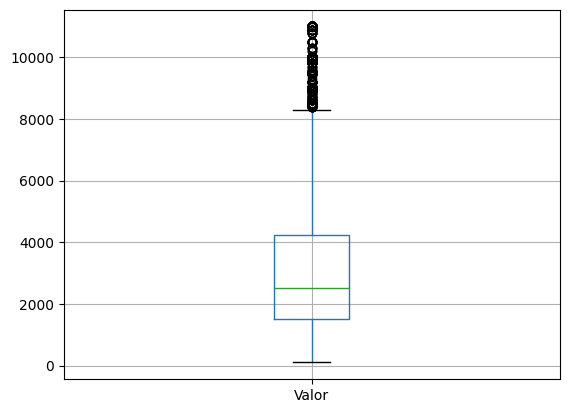

In [73]:
datos_new.boxplot(['Valor']);

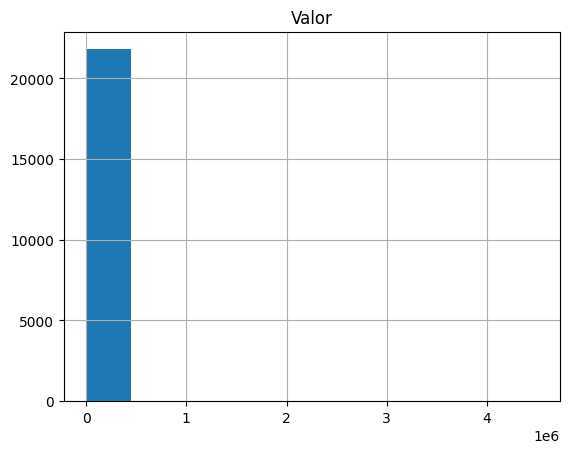

In [84]:
datos.hist('Valor')
plt.show()

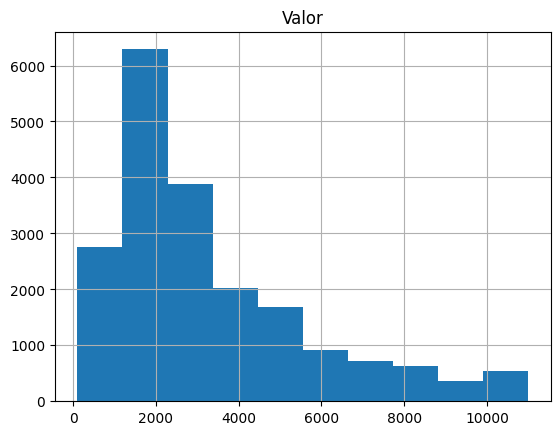

In [85]:
datos_new.hist('Valor')
plt.show()

In [86]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,29.33,Departamento
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,15.38,Departamento
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,31.66,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,21.88,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,65.28,Departamento


In [88]:
datos['Tipo'].unique()

array(['Habitación', 'Casa', 'Departamento', 'Casa en condominio',
       'Casa de villa'], dtype=object)

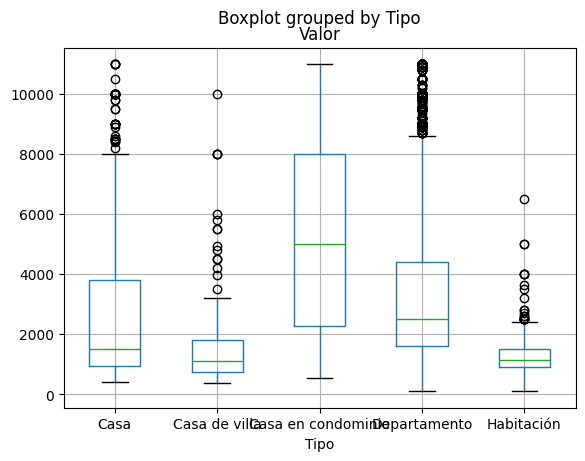

In [101]:
datos_new.boxplot('Valor', by='Tipo')
plt.show()

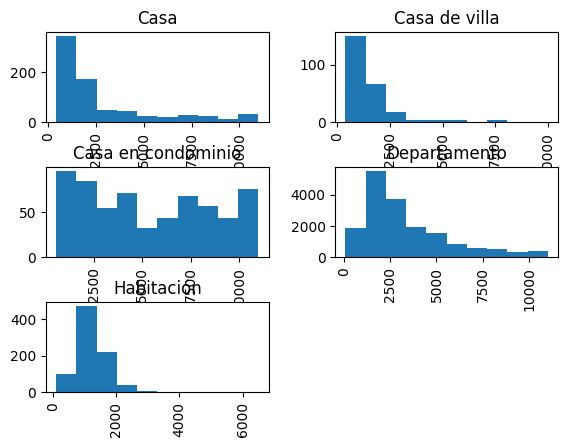

In [99]:
datos_new.hist('Valor', by='Tipo')
plt.show()

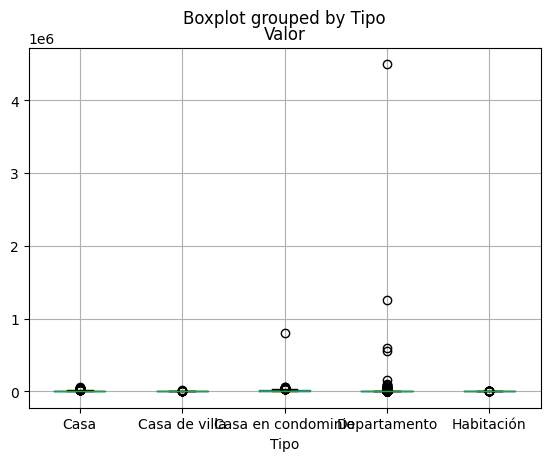

In [98]:
datos.boxplot('Valor', by='Tipo');
plt.show()

In [107]:
grupo_tipo = datos.groupby('Tipo')['Valor']

In [111]:
grupo_tipo.groups

{'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa de villa': [81, 212, 220, 303, 332, 697, 822, 844, 918, 1012, 1353, 1362, 1447, 1491, 1553, 1639, 1669, 1703, 1769, 2087, 2249, 2267, 2446, 2533, 2547, 2605, 2641, 2727, 2840, 2872, 2977, 2984, 3017, 3025, 3300, 3426, 3523, 3703, 3823, 3855, 3858, 3863, 4094, 4146, 4153, 4165, 4340, 4444, 4826, 5151, 5170, 5175, 5198, 5294, 5410, 5535, 5597, 5724, 5751, 5911, 5950, 5995, 6008, 6031, 6049, 6201, 6236, 6300, 6348, 6402, 6429, 6754, 

In [112]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [120]:
datos_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = datos['Tipo']  == tipo
    eh_dentro_limite = (datos['Valor'] >= limite_inferior[tipo]) & (datos['Valor'] <= limite_superior[tipo])
    seleccion = eh_tipo & eh_dentro_limite
    datos_seleccion = datos[seleccion]
    datos_new = pd.concat([datos_new, datos_seleccion])

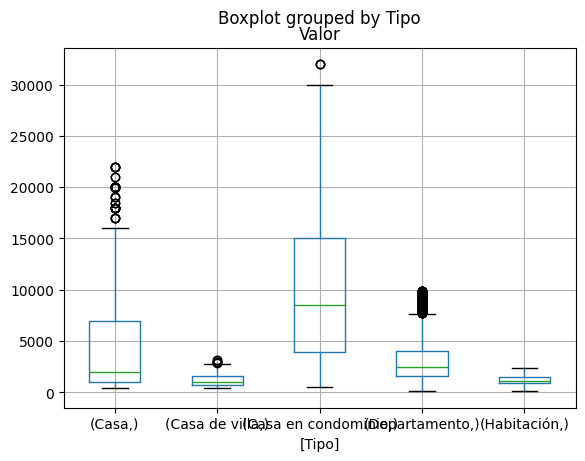

In [122]:
datos_new.boxplot(['Valor'], by= ['Tipo'])
plt.show()

In [ ]:
datos_new.to_csv('alquiler_residencial_sin_outliers.csv', sep=';', index=False)